# Classification for Breast Cancer Prediction

*Predict whether a patient diagnosis of breast tissue is malignant or benign*

In [1]:
# Upload the needed libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Load in the data
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set a global seed value
seed_value = 1234

# Make sure we have the latests library versions
print('tensorflow version:', tf.__version__)
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('matplotlib version:', matplotlib.__version__)

tensorflow version: 2.2.0
numpy version: 1.18.4
pandas version: 1.0.5
matplotlib version: 3.2.2


In [2]:
# Load in the data part of scikit learn
data = load_breast_cancer()

In [3]:
# Check the 'data' type
type(data)

sklearn.utils.Bunch

In [4]:
# The key value 'data' refers to the input 'X' and 'target' key value means 'y'
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# checking data atributes or dimensions
# we have 569 samples, 30 features
data.data.shape

(569, 30)

In [6]:
# The targets are a 1-D array of 0's and 1's
# let's look at the first 25s
data.target[0:24]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0])

In [7]:
# Target names stand for malignant or benign
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
# Confirm the target length is the same as total samples
data.target.shape

(569,)

In [9]:
# Feature names
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
# Split the data into train/test

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [11]:
# Scale the data by standardazation or normalization
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:
# Using tensorflow to build the model

tf.random.set_seed(seed_value)

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [13]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100) 

Epoch 1/100
12/12 [==============================] - 0s 21ms/step - loss: 0.8265 - accuracy: 0.4252 - val_loss: 0.8488 - val_accuracy: 0.4734
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7363 - accuracy: 0.5092 - val_loss: 0.7543 - val_accuracy: 0.5426
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6586 - accuracy: 0.5774 - val_loss: 0.6711 - val_accuracy: 0.6117
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5896 - accuracy: 0.6640 - val_loss: 0.6005 - val_accuracy: 0.6862
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5308 - accuracy: 0.7690 - val_loss: 0.5408 - val_accuracy: 0.7447
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4819 - accuracy: 0.8373 - val_loss: 0.4896 - val_accuracy: 0.8138
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4390 - accuracy: 0.8898 - val_loss: 0.4479 - val_accuracy: 0.8298
Epoch 8/100


In [14]:
# Evaluate the model
# return loss and accuracy 
print('Train set score: ', model.evaluate(X_train, y_train))
print('Test set score: ', model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 3ms/step - loss: 0.0880 - accuracy: 0.9816
Train set score:  [0.08798940479755402, 0.9816272854804993]
6/6 [==============================] - 0s 4ms/step - loss: 0.1126 - accuracy: 0.9681
Test set score:  [0.11255957186222076, 0.9680851101875305]


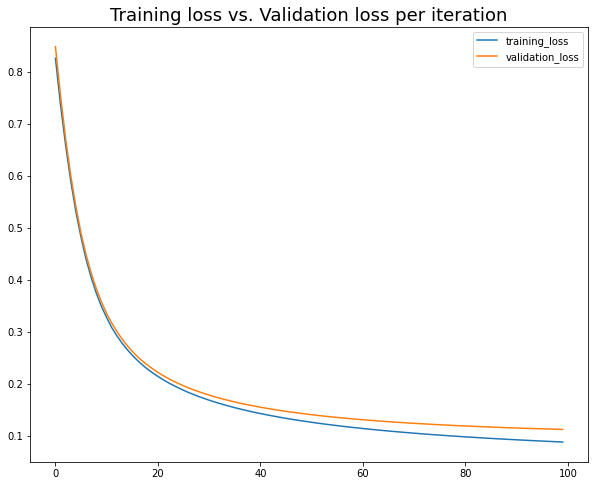

In [15]:
# Plot what's returned by model.fit()
# The loss per iteration

plt.figure(figsize=(10,8))
plt.title('Training loss vs. Validation loss per iteration', fontsize=18)
plt.plot(r.history['loss'], label='training_loss')
plt.plot(r.history['val_loss'], label='validation_loss')
plt.legend();

We see there is a steady decrease of loss per iteration.

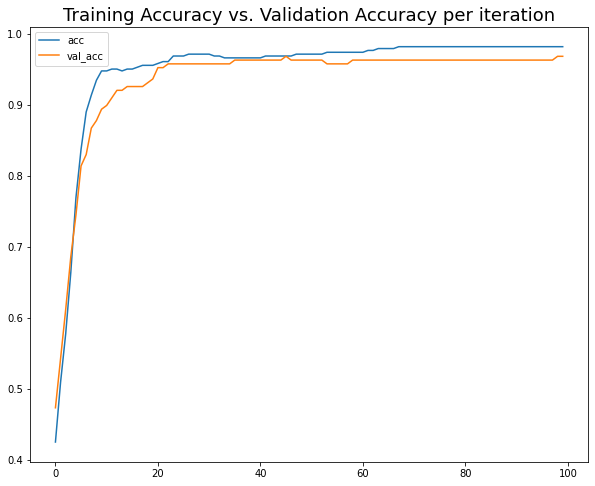

In [16]:
# Plotting the accuracy per iteration

plt.figure(figsize=(10,8))
plt.title("Training Accuracy vs. Validation Accuracy per iteration", fontsize=(18))
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

We see a steady increase at each iteration.

In [17]:
# Making predictions on the testing set
pred = model.predict(X_test)

# Outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)
# Let's check the first 11 predictions
print(pred[0:10])

[[1.8972158e-04]
 [1.8785477e-02]
 [9.8461807e-01]
 [5.1560998e-03]
 [4.9742392e-01]
 [1.8048286e-04]
 [3.0156970e-04]
 [9.8117602e-01]
 [9.9781054e-01]
 [1.0656783e-01]]


In [18]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
pred = np.round(pred).flatten()
# Let's check the first 11 predictions
print(pred[0:10])

[0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]


In [19]:
# Calculate the accuracy and compare it to the evaluate() output
print("Manually calculated accuracy: ", np.mean(pred == y_test))
print("Evaluate output: ", model.evaluate(X_test, y_test))

Manually calculated accuracy:  0.9680851063829787
6/6 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9681
Evaluate output:  [0.11255957186222076, 0.9680851101875305]


In [20]:
# Saving the mmodel to a file
model.save('breast-cancer_classifier.h5')

In [21]:
# Let's load the model and confirm that it still works
model = tf.keras.models.load_model('breast-cancer_classifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9681


[0.11255957186222076, 0.9680851101875305]